In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from xgboost import XGBRegressor

In [160]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

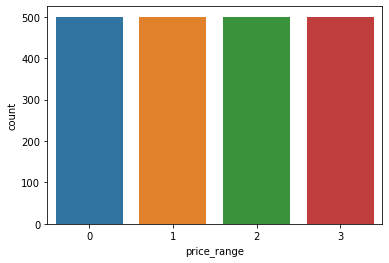

In [162]:
sns.countplot(data=df,x='price_range')
plt.show()

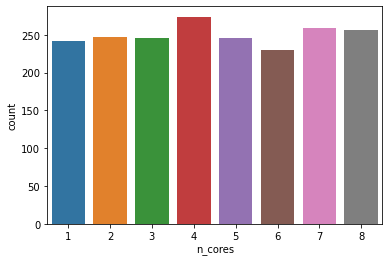

In [163]:
sns.countplot(data=df,x='n_cores')
plt.show()

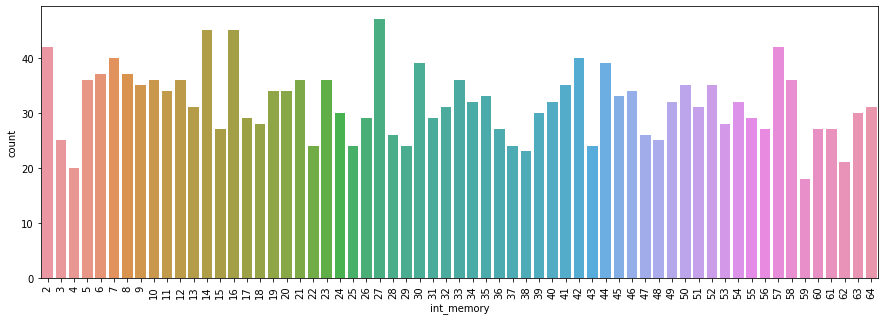

In [164]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='int_memory')
plt.xticks(rotation='vertical')
plt.show()

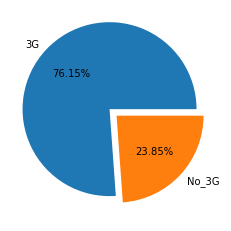

In [165]:
plt.pie(x=df['three_g'].value_counts(),explode=[0.1,0.01],autopct='%1.2f%%',labels=['3G','No_3G'])
plt.show()

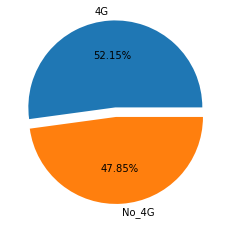

In [166]:
plt.pie(x=df['four_g'].value_counts(),explode=[0.1,0.01],autopct='%1.2f%%',labels=['4G','No_4G'])
plt.show()

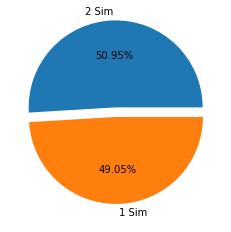

In [167]:
plt.pie(x=df['dual_sim'].value_counts(),explode=[0.1,0.01],autopct='%1.2f%%',labels=['2 Sim','1 Sim'])
plt.show()

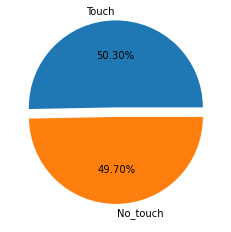

In [168]:
plt.pie(x=df['touch_screen'].value_counts(),explode=[0.1,0.01],autopct='%1.2f%%',labels=['Touch','No_touch'])
plt.show()

In [169]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


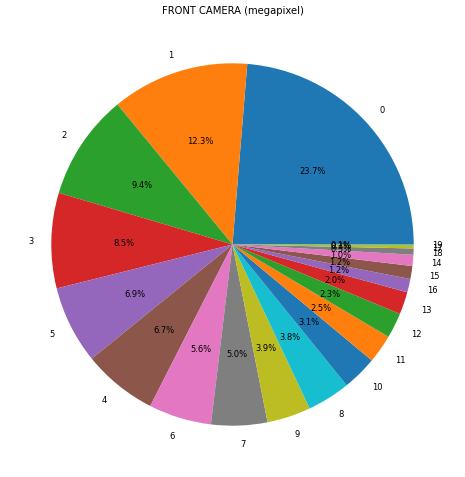

In [170]:
plt.figure(figsize=(10,10),dpi=60)
plt.title('FRONT CAMERA (megapixel)')
plt.pie(x=df['fc'].value_counts(),autopct='%1.1f%%',labels=df['fc'].value_counts().index)
plt.show()

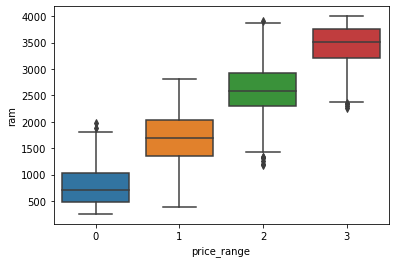

In [171]:
sns.boxplot(data=df,x='price_range',y='ram')
plt.show()

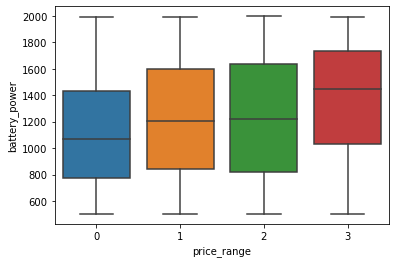

In [172]:
sns.boxplot(data=df,x='price_range',y='battery_power')
plt.show()

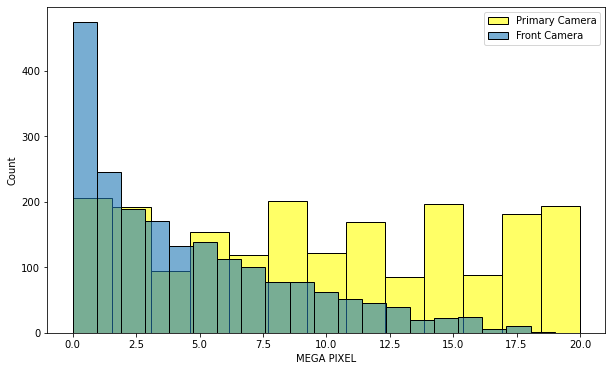

In [173]:
plt.figure(figsize=(10,6))
plt.xlabel("MEGA PIXEL")
sns.histplot(data=df,x='pc',color='yellow',label='Primary Camera',alpha=0.6)
sns.histplot(data=df,x='fc',label='Front Camera',alpha=0.6)
plt.legend()
plt.show()

In [174]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<AxesSubplot:>

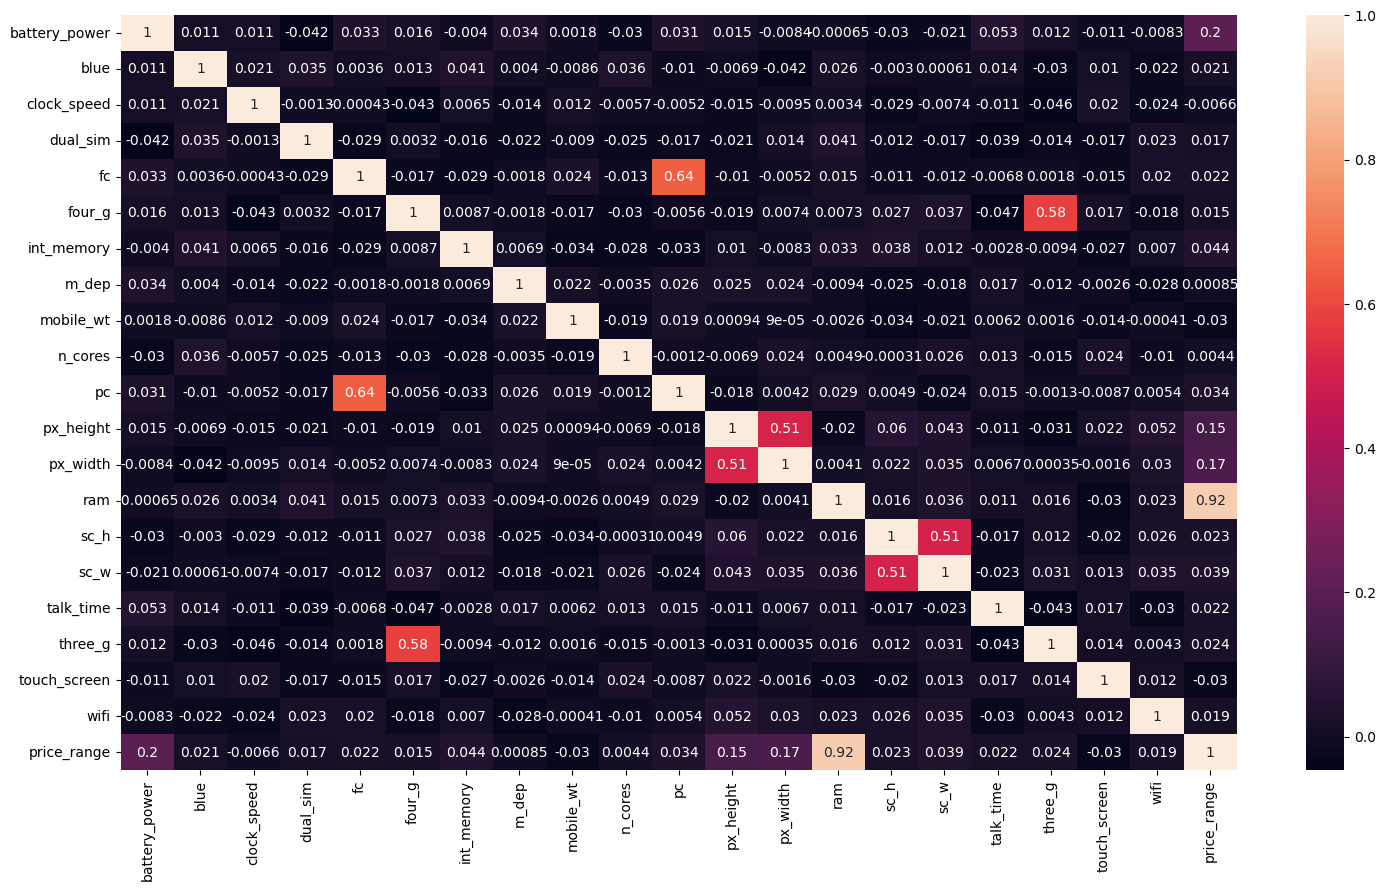

In [175]:
plt.figure(figsize=(18,10),dpi=100)
sns.heatmap(df.corr(),annot=True)

In [176]:
dff = df.copy()
dfff = df.copy()

In [177]:
dff.drop('three_g',axis=1,inplace=True)
dfff.drop('px_width',axis=1,inplace=True)

<AxesSubplot:>

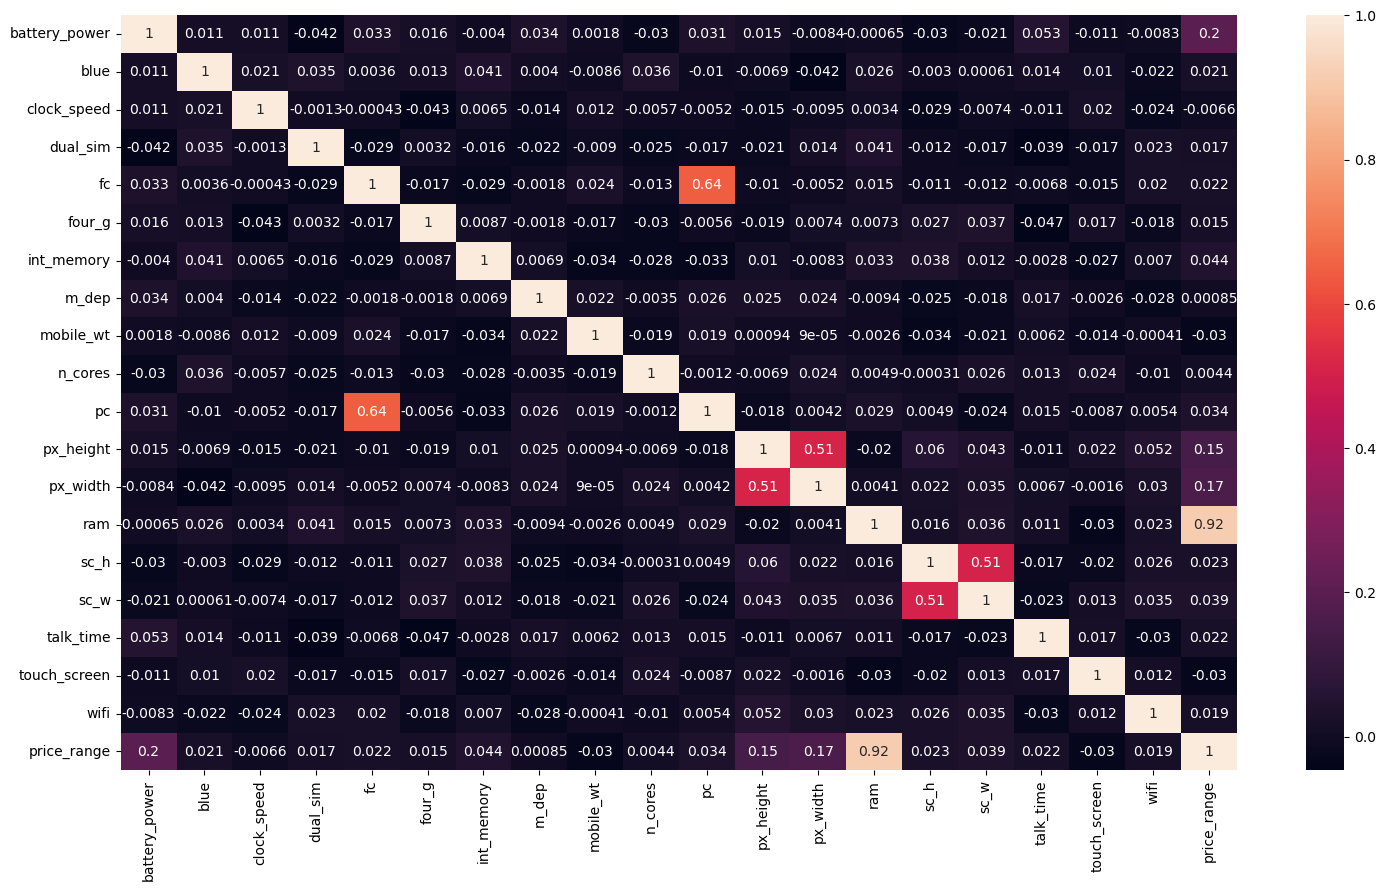

In [178]:
plt.figure(figsize=(18,10),dpi=100)
sns.heatmap(dff.corr(),annot=True)

<AxesSubplot:>

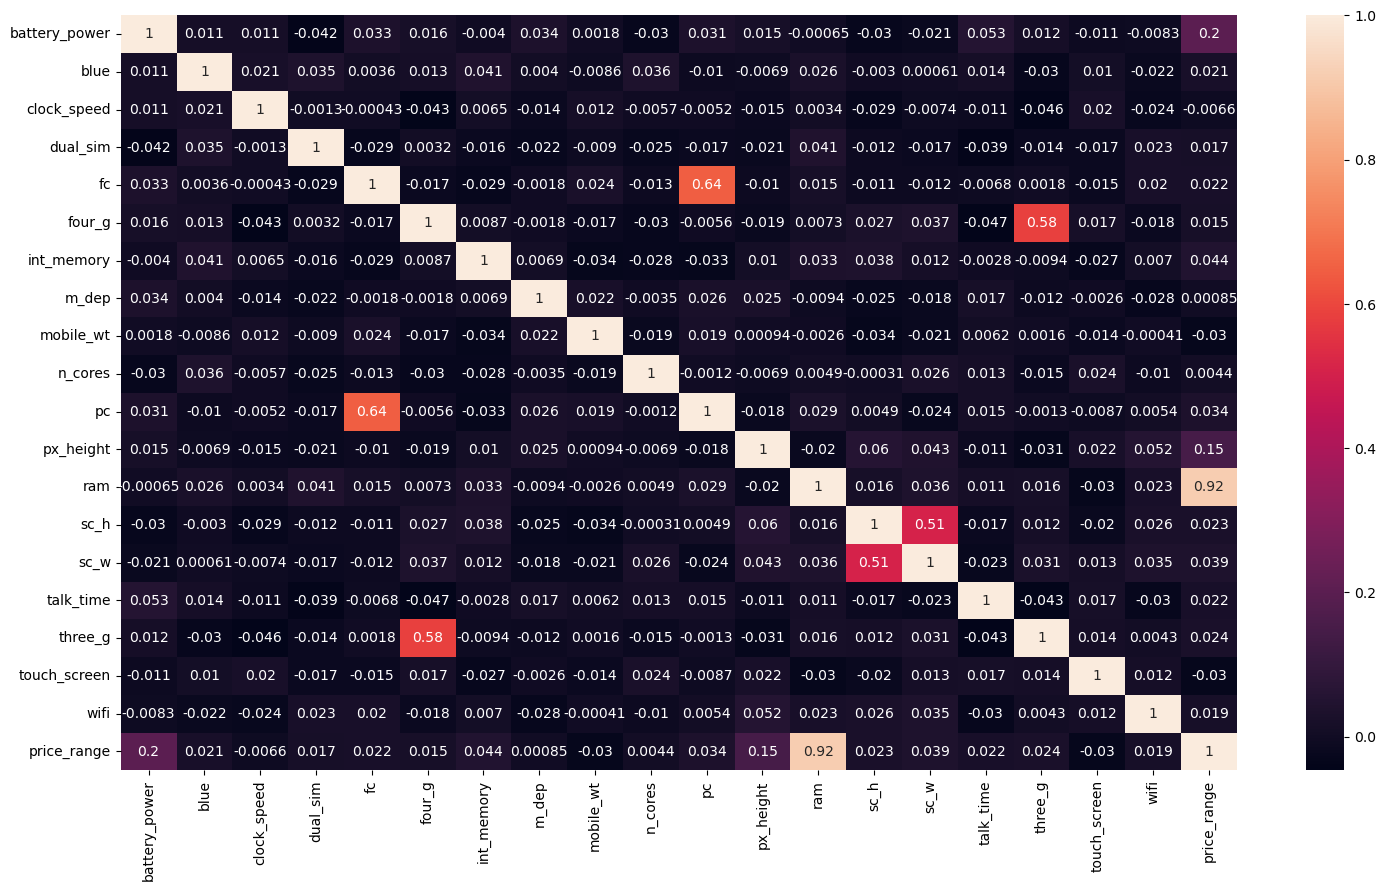

In [179]:
plt.figure(figsize=(18,10),dpi=100)
sns.heatmap(dfff.corr(),annot=True)

In [180]:
dg = df.copy()
dg.drop(['three_g','sc_w','fc','px_width'],axis=1,inplace=True)

<AxesSubplot:>

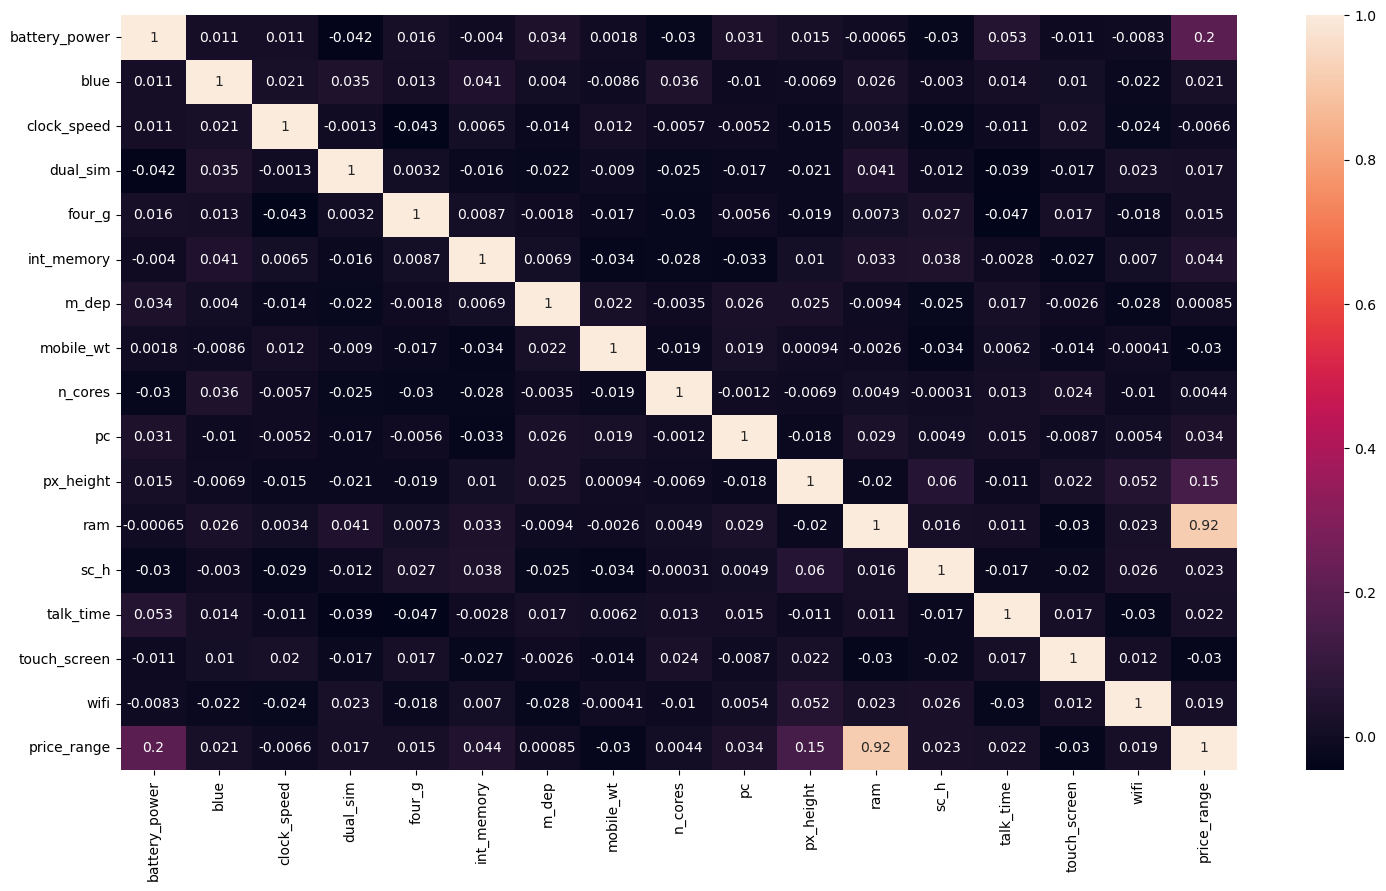

In [181]:
plt.figure(figsize=(18,10),dpi=100)
sns.heatmap(dg.corr(),annot=True)

In [182]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [183]:
features = df.drop('price_range',axis=1)
target = df['price_range']
x_train , x_val, y_train, y_val = train_test_split(features,target,test_size=0.2,random_state=12)

In [184]:
scaller = MinMaxScaler(feature_range=(0,1))
xtr_scalled = pd.DataFrame(data=scaller.fit_transform(x_train),columns=x_train.columns)
xval_scalled = pd.DataFrame(data=scaller.transform(x_val),columns=x_test.columns)

In [145]:
ln = LinearRegression()
ln.fit(xtr_scalled,y_train)
prediction = np.round(ln.predict(xval_scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m1=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['LinearRegression'])
m1

,score,mse,mae,rmse
LinearRegression,0.909946,0.1125,0.1125,0.33541


In [146]:
tr = DecisionTreeRegressor()
tr.fit(xtr_scalled,y_train)
prediction = np.round(tr.predict(xval_scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m2=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['DecisionTree'])
m2

,score,mse,mae,rmse
DecisionTree,0.835901,0.205,0.205,0.452769


In [147]:
fr = RandomForestRegressor()
fr.fit(xtr_scalled,y_train)
prediction = np.round(fr.predict(xval_scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m3=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['RandomForest'])
m3

,score,mse,mae,rmse
RandomForest,0.93396,0.0825,0.0825,0.287228


In [148]:
xg = XGBRegressor()
xg.fit(xtr_scalled,y_train)
prediction = np.round(xg.predict(xval_scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m4=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['XGB'])
m4

,score,mse,mae,rmse
XGB,0.931959,0.085,0.085,0.291548


In [149]:
gr = GradientBoostingRegressor()
gr.fit(xtr_scalled,y_train)
prediction = np.round(gr.predict(xval_scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m5=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['GradientBoosting'])
m5

,score,mse,mae,rmse
GradientBoosting,0.935961,0.08,0.08,0.282843


# predicting without features that has possibility for multicoliniarity

In [120]:
featuress = dg.drop('price_range',axis=1)
targett = dg['price_range']
x_train , x_test, y_train, y_test = train_test_split(featuress,targett,test_size=0.2,random_state=12)

In [150]:
scaller = MinMaxScaler(feature_range=(0,1))
xtr_scalledd = pd.DataFrame(data=scaller.fit_transform(x_train),columns=x_train.columns)
x_vall_Scalled = pd.DataFrame(data=scaller.transform(x_val),columns=x_test.columns)

In [151]:
ln = LinearRegression()
ln.fit(xtr_scalledd,y_train)
prediction = np.round(ln.predict(x_vall_Scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m1=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['LinearRegression'])
m1

,score,mse,mae,rmse
LinearRegression,0.909946,0.1125,0.1125,0.33541


In [152]:
tr = DecisionTreeRegressor()
tr.fit(xtr_scalledd,y_train)
prediction = np.round(tr.predict(x_vall_Scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m2=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['DecisionTree'])
m2

,score,mse,mae,rmse
DecisionTree,0.855913,0.18,0.18,0.424264


In [153]:
fr = RandomForestRegressor()
fr.fit(xtr_scalledd,y_train)
prediction = np.round(fr.predict(x_vall_Scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m3=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['RandomForest'])
m3

,score,mse,mae,rmse
RandomForest,0.919952,0.1,0.1,0.316228


In [154]:
xg = XGBRegressor()
xg.fit(xtr_scalledd,y_train)
prediction = np.round(xg.predict(x_vall_Scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m4=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['XGB'])
m4

,score,mse,mae,rmse
XGB,0.931959,0.085,0.085,0.291548


In [155]:
gr = GradientBoostingRegressor()
gr.fit(xtr_scalledd,y_train)
prediction = np.round(gr.predict(x_vall_Scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m5=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['GradientBoosting'])
m5

,score,mse,mae,rmse
GradientBoosting,0.935961,0.08,0.08,0.282843


In [156]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(xtr_scalledd,y_train)
prediction = np.round(knn.predict(x_vall_Scalled),0)
score = r2_score(y_val,prediction)
mse = mean_squared_error(y_val,prediction)
mae = mean_absolute_error(y_val,prediction)
rmse = np.sqrt(mse)
m6=pd.DataFrame({'score':score,'mse':mse,'mae':mae,'rmse':rmse},index=['Kneighbors'])
m6

,score,mse,mae,rmse
Kneighbors,0.169498,1.0375,0.7475,1.018577


In [157]:
prediction

array([1, 3, 2, 2, 0, 1, 1, 2, 0, 0, 0, 3, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2,
       0, 2, 1, 1, 2, 3, 1, 2, 0, 3, 0, 1, 0, 3, 1, 2, 1, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 3, 3, 3, 2, 0, 0, 1,
       2, 2, 1, 2, 3, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 3, 0, 1, 0, 2,
       3, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 3, 0, 0, 2, 1, 0, 0, 1, 3, 2, 1,
       0, 1, 0, 1, 1, 0, 3, 3, 3, 3, 1, 2, 0, 0, 0, 3, 1, 2, 3, 2, 0, 3,
       2, 3, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 3, 1, 0, 2, 0, 3, 2, 2, 1, 0,
       3, 3, 1, 0, 1, 2, 1, 2, 2, 3, 1, 2, 1, 0, 2, 3, 1, 0, 0, 1, 0, 2,
       3, 0, 2, 1, 1, 1, 2, 3, 1, 2, 0, 1, 3, 0, 2, 0, 2, 2, 3, 2, 3, 3,
       1, 3, 0, 0, 0, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 1, 0, 2, 2, 2, 2, 1, 2, 3, 0, 0, 1, 2, 2, 0, 2, 3, 3, 2, 2,
       0, 3, 2, 1, 1, 2, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 2, 3, 3, 3, 2, 1,
       2, 1, 0, 1, 1, 2, 2, 2, 3, 2, 0, 1, 0, 0, 2,

In [158]:
test = pd.read_csv('test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [159]:
test.drop('id',axis=1,inplace=True)

In [185]:
test_scalled  = pd.DataFrame(data=scaller.transform(test),columns=test.columns)
test_scalled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.362057,1.0,0.52,1.0,0.736842,0.0,0.048387,0.000000,0.941667,0.285714,0.80,0.115306,0.609218,0.860888,0.500000,0.388889,0.000000,0.0,1.0,0.0
1,0.227121,1.0,0.00,1.0,0.210526,1.0,0.951613,0.777778,0.925000,0.571429,0.60,0.380612,0.238477,0.972980,0.071429,0.000000,0.277778,1.0,0.0,0.0
2,0.872411,1.0,0.92,0.0,0.052632,0.0,0.403226,0.888889,0.883333,0.285714,0.20,0.647959,0.578490,0.571964,0.857143,0.555556,0.444444,0.0,1.0,1.0
3,0.698063,0.0,0.00,1.0,0.947368,1.0,0.370968,0.444444,0.133333,1.000000,1.00,0.150510,0.836339,0.972445,0.357143,0.000000,0.277778,1.0,1.0,0.0
4,0.623246,0.0,0.36,0.0,0.578947,1.0,0.758065,0.444444,0.233333,0.714286,0.90,0.382143,0.207081,0.405297,0.714286,0.444444,0.277778,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.800935,1.0,0.56,0.0,0.000000,1.0,0.838710,0.444444,0.750000,0.857143,0.85,0.328571,0.275885,0.498395,0.642857,0.444444,0.722222,1.0,1.0,0.0
996,0.072144,0.0,0.52,1.0,0.000000,0.0,0.177419,0.888889,0.883333,0.428571,0.10,0.587755,0.756179,0.448101,0.214286,0.055556,0.944444,0.0,1.0,1.0
997,0.456914,0.0,0.36,0.0,0.052632,1.0,0.096774,0.444444,0.000000,0.000000,0.60,0.243367,0.217101,0.258159,0.000000,0.000000,0.666667,1.0,0.0,0.0
998,0.689379,1.0,0.00,1.0,0.000000,0.0,0.774194,0.333333,0.758333,0.142857,0.60,0.019388,0.221777,0.602194,0.714286,0.611111,0.222222,0.0,1.0,0.0


In [187]:
ln = LinearRegression()
ln.fit(xtr_scalled,y_train)
prediction = np.round(ln.predict(test_scalled),0)
prediction

array([ 3.,  3.,  2.,  3.,  1.,  3.,  4.,  1.,  3.,  0.,  3.,  3., -0.,
        0.,  2.,  0.,  2.,  1.,  3.,  2.,  1.,  2.,  1.,  1.,  3.,  0.,
        2., -0.,  3.,  0.,  2.,  0.,  3.,  0.,  1.,  1.,  3.,  1.,  2.,
        1.,  1.,  2., -0., -0.,  0.,  1.,  0.,  3.,  1.,  2.,  1.,  0.,
        2.,  0.,  3.,  1.,  3.,  1.,  1.,  3.,  3.,  3.,  0.,  1.,  1.,
        1.,  1.,  2.,  1.,  2.,  1.,  2.,  2.,  3.,  3., -0.,  2.,  0.,
        2.,  3.,  0.,  3.,  3.,  0.,  3.,  0.,  3.,  1.,  3.,  0.,  1.,
        2.,  2.,  1.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  0., -0.,  3.,
        1.,  2.,  0.,  1.,  2.,  3.,  3.,  2.,  1.,  3.,  3.,  3.,  3.,
        2.,  3.,  0., -0.,  3.,  2.,  1.,  2.,  0.,  3.,  2.,  2.,  1.,
       -1.,  2.,  1.,  1.,  3.,  1.,  1., -0.,  3.,  2.,  1.,  2.,  1.,
        2.,  2.,  3.,  3.,  2.,  2.,  3.,  2.,  3.,  1.,  0.,  3.,  2.,
        4.,  3.,  3.,  3.,  2.,  2.,  3.,  3.,  3.,  3.,  1., -0.,  3.,
       -0., -1.,  0.,  2.,  1., -0.,  1.,  0.,  0.,  1.,  2.,  1

In [188]:
tr = DecisionTreeRegressor()
tr.fit(xtr_scalled,y_train)
prediction = np.round(tr.predict(test_scalled),0)
prediction

array([3., 3., 3., 3., 2., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 0., 2.,
       1., 3., 2., 1., 3., 1., 2., 3., 0., 2., 0., 2., 0., 3., 0., 3., 0.,
       1., 1., 3., 1., 3., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       1., 2., 0., 3., 1., 3., 1., 1., 3., 3., 2., 0., 1., 1., 1., 1., 2.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 1., 2., 3., 0., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 2., 2., 0., 1., 2., 0., 2., 1., 3., 1., 0.,
       0., 3., 0., 2., 0., 1., 2., 3., 3., 3., 1., 3., 3., 3., 3., 1., 3.,
       0., 0., 3., 2., 1., 2., 0., 3., 3., 2., 1., 0., 2., 2., 1., 3., 0.,
       1., 0., 3., 2., 1., 3., 1., 3., 2., 3., 3., 2., 2., 3., 2., 3., 0.,
       0., 3., 2., 3., 3., 3., 3., 2., 1., 3., 3., 3., 3., 1., 0., 3., 0.,
       0., 0., 2., 0., 0., 1., 0., 0., 1., 2., 1., 0., 0., 0., 1., 2., 2.,
       2., 0., 0., 0., 0., 1., 3., 1., 0., 1., 2., 2., 2., 1., 1., 3., 3.,
       3., 2., 2., 1., 0., 0., 1., 2., 0., 2., 3., 3., 0., 2., 0., 3., 2.,
       2., 3., 1., 0., 1.

In [189]:
fr = RandomForestRegressor()
fr.fit(xtr_scalled,y_train)
prediction = np.round(fr.predict(test_scalled),0)
prediction

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 0., 2.,
       1., 3., 2., 1., 3., 1., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 0.,
       0., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 3., 0., 3., 1., 3., 1., 1., 3., 3., 3., 0., 1., 1., 1., 1., 2.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 0., 2., 3., 1., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 2., 2., 0., 2., 2., 0., 2., 1., 3., 1., 0.,
       0., 3., 0., 2., 0., 1., 2., 3., 3., 3., 1., 3., 3., 3., 3., 2., 3.,
       0., 0., 3., 2., 1., 1., 0., 3., 2., 3., 1., 0., 2., 1., 1., 3., 1.,
       1., 0., 3., 2., 1., 3., 1., 3., 2., 3., 3., 2., 2., 3., 3., 3., 0.,
       0., 3., 2., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 1., 0., 3., 0.,
       0., 0., 2., 0., 0., 1., 1., 0., 1., 2., 1., 0., 0., 1., 2., 2., 2.,
       1., 0., 0., 0., 0., 0., 3., 2., 0., 2., 2., 2., 3., 1., 2., 3., 3.,
       3., 2., 2., 1., 0., 0., 1., 2., 0., 2., 3., 3., 0., 2., 0., 3., 2.,
       2., 3., 0., 0., 1.

In [190]:
xg = XGBRegressor()
xg.fit(xtr_scalled,y_train)
prediction = np.round(xg.predict(test_scalled),0)
prediction

array([ 3.,  3.,  2.,  3.,  1.,  3.,  3.,  1.,  3.,  0.,  3.,  3.,  0.,
        0.,  2.,  0.,  2.,  1.,  3.,  2.,  0.,  3.,  2.,  1.,  3.,  0.,
        2.,  0.,  3., -0.,  3., -0.,  3., -0.,  0.,  1.,  3.,  1.,  2.,
        1.,  1.,  2., -0.,  0.,  0.,  1.,  0.,  3.,  1.,  2.,  1., -0.,
        3., -0.,  3.,  1.,  3.,  1.,  1.,  3.,  3.,  2., -0.,  1.,  1.,
        1.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,  3.,  3.,  0.,  2.,  0.,
        2.,  3.,  0.,  3.,  3., -0.,  3.,  0.,  3.,  1.,  3., -0.,  1.,
        2.,  2.,  1.,  2.,  2.,  0.,  2.,  1.,  3.,  1.,  0., -0.,  3.,
        0.,  2.,  0.,  1.,  2.,  3.,  3.,  2.,  1.,  3.,  3.,  3.,  3.,
        2.,  3.,  0., -0.,  3.,  2.,  1.,  2.,  0.,  3.,  2.,  3.,  1.,
       -0.,  2.,  1.,  1.,  3.,  0.,  2.,  0.,  3.,  2.,  1.,  3.,  1.,
        3.,  2.,  3.,  3.,  2.,  2.,  3.,  2.,  3.,  0.,  0.,  3.,  2.,
        3.,  3.,  3.,  3.,  3.,  2.,  3.,  3.,  3.,  3.,  1., -0.,  3.,
        0., -0., -0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  2.,  1

In [191]:
gr = GradientBoostingRegressor()
gr.fit(xtr_scalled,y_train)
prediction = np.round(gr.predict(test_scalled),0)
prediction

array([ 3.,  3.,  3.,  3.,  1.,  3.,  3.,  1.,  3., -0.,  3.,  3.,  0.,
        0.,  2.,  0.,  2.,  1.,  3.,  2.,  1.,  2.,  1.,  1.,  3.,  0.,
        2., -0.,  3., -0.,  2.,  0.,  3.,  0.,  0.,  1.,  3.,  1.,  2.,
        1.,  1.,  2., -0., -0.,  0.,  1.,  0.,  3.,  1.,  2.,  1.,  0.,
        3.,  0.,  3.,  1.,  3.,  1.,  1.,  3.,  3.,  2.,  0.,  2.,  1.,
        1.,  1.,  3.,  1.,  2.,  1.,  2.,  2.,  3.,  3., -0.,  2.,  0.,
        2.,  3.,  0.,  3.,  3., -0.,  3.,  0.,  3.,  1.,  3.,  0.,  1.,
        2.,  2.,  1.,  2.,  1.,  0.,  2.,  1.,  3.,  1.,  0., -0.,  3.,
        0.,  2.,  0.,  1.,  2.,  3.,  3.,  2.,  1.,  3.,  3.,  3.,  3.,
        2.,  3.,  0.,  0.,  3.,  2.,  1.,  1.,  0.,  3.,  2.,  3.,  1.,
       -0.,  2.,  1.,  1.,  3.,  1.,  1.,  0.,  3.,  2.,  1.,  2.,  1.,
        2.,  2.,  3.,  3.,  2.,  2.,  3.,  2.,  3.,  0.,  0.,  3.,  2.,
        3.,  3.,  3.,  3.,  3.,  2.,  3.,  3.,  3.,  3.,  1., -0.,  3.,
       -0., -0.,  0.,  2.,  0., -0.,  1.,  0.,  0.,  1.,  2.,  1